<a href="https://colab.research.google.com/github/sakay0731/123/blob/main/41114G071%E6%B3%95%E5%B0%88%E4%B8%89%E4%BD%99%E6%BD%94%E6%9C%9F%E6%9C%AB%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **資料設定**

In [ ]:
# ⬇️ 先安裝必要套件
!pip install odfpy

import os
import pandas as pd
from pathlib import Path
from zipfile import ZipFile

# ⬆️ 上傳你的壓縮檔：犯罪統計數據.zip
from google.colab import files
uploaded = files.upload()

# 解壓縮檔案
with ZipFile("犯罪統計數據.zip", 'r') as zip_ref:
    zip_ref.extractall("crime_data")

# 建立輸出資料夾
output_root = Path("converted_data")
output_root.mkdir(exist_ok=True)

# 處理 .ods 檔案
for file_path in Path("crime_data").rglob("*.ods"):
    try:
        # 讀取資料
        df = pd.read_excel(file_path, engine="odf")

        # 解析年份：從第一列找出 "中華民國XXX年" 字樣
        date_info = df.iloc[0, 0] if not pd.isna(df.iloc[0, 0]) else ""
        year = None
        if isinstance(date_info, str) and "中華民國" in date_info:
            year = date_info.split("年")[0].replace("中華民國", "").strip()

        if year is None or not year.isdigit():
            print(f"❌ 無法解析年份：{file_path.name}")
            continue

        # 建立年份資料夾
        year_folder = output_root / year
        year_folder.mkdir(exist_ok=True)

        # 轉換成 CSV 檔案
        csv_filename = file_path.with_suffix(".csv").name
        output_path = year_folder / csv_filename
        df.to_csv(output_path, index=False, encoding="utf-8-sig")

        print(f"✅ 已轉換：{file_path.name} → {output_path}")

    except Exception as e:
        print(f"⚠️ 錯誤處理檔案 {file_path.name}：{e}")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=877bc57ed005251d38f63cdc5eb8b8f2dee2761c87d8b0a5e950b6a54bca8198
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


Saving 犯罪統計數據.zip to 犯罪統計數據 (1).zip
❌ 無法解析年份：112ª~5ñδ8ñΘª▄112ª~5ñδ14ñΘ╕Ω«╞.ods
❌ 無法解析年份：112ª~4ñδ17ñΘª▄112ª~4ñδ23ñΘ╕Ω«╞.ods
✅ 已轉換：108ª~10ñδ28ñΘª▄108ª~11ñδ3ñΘ╕Ω«╞.ods → converted_data/108/108ª~10ñδ28ñΘª▄108ª~11ñδ3ñΘ╕Ω«╞.csv
✅ 已轉換：107ª~1ñδ8ñΘª▄107ª~1ñδ14ñΘ╕Ω«╞.ods → converted_data/107/107ª~1ñδ8ñΘª▄107ª~1ñδ14ñΘ╕Ω«╞.csv
✅ 已轉換：107ª~1ñδ22ñΘª▄107ª~1ñδ28ñΘ╕Ω«╞.ods → converted_data/107/107ª~1ñδ22ñΘª▄107ª~1ñδ28ñΘ╕Ω«╞.csv
✅ 已轉換：107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.ods → converted_data/107/107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.csv
❌ 無法解析年份：112ª~11ñδ20ñΘª▄112ª~11ñδ26ñΘ╕Ω«╞.ods
❌ 無法解析年份：113ª~2ñδ19ñΘª▄113ª~2ñδ25ñΘ╕Ω«╞.ods
✅ 已轉換：109ª~2ñδ3ñΘª▄109ª~2ñδ9ñΘ╕Ω«╞.ods → converted_data/109/109ª~2ñδ3ñΘª▄109ª~2ñδ9ñΘ╕Ω«╞.csv
✅ 已轉換：109ª~8ñδ10ñΘª▄109ª~8ñδ16ñΘ╕Ω«╞.ods → converted_data/109/109ª~8ñδ10ñΘª▄109ª~8ñδ16ñΘ╕Ω«╞.csv
❌ 無法解析年份：112ª~9ñδ4ñΘª▄112ª~9ñδ10ñΘ╕Ω«╞.ods
✅ 已轉換：109ª~5ñδ18ñΘª▄109ª~5ñδ24ñΘ╕Ω«╞.ods → converted_data/109/109ª~5ñδ18ñΘª▄109ª~5ñδ24ñΘ╕Ω«╞.csv
✅ 已轉換：110ª~6ñδ14ª▄110ª~6ñδ20ñΘ╕Ω«╞.ods → converted_data/110/110ª~6ñδ14ª

In [ ]:
import os

for root, dirs, files in os.walk("/content/crime_data"):
    for file in files:
        print(os.path.join(root, file))


/content/crime_data/112ª~5ñδ8ñΘª▄112ª~5ñδ14ñΘ╕Ω«╞.ods
/content/crime_data/112ª~4ñδ17ñΘª▄112ª~4ñδ23ñΘ╕Ω«╞.ods
/content/crime_data/108ª~10ñδ28ñΘª▄108ª~11ñδ3ñΘ╕Ω«╞.ods
/content/crime_data/107ª~1ñδ8ñΘª▄107ª~1ñδ14ñΘ╕Ω«╞.ods
/content/crime_data/107ª~1ñδ22ñΘª▄107ª~1ñδ28ñΘ╕Ω«╞.ods
/content/crime_data/107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.ods
/content/crime_data/112ª~11ñδ20ñΘª▄112ª~11ñδ26ñΘ╕Ω«╞.ods
/content/crime_data/113ª~2ñδ19ñΘª▄113ª~2ñδ25ñΘ╕Ω«╞.ods
/content/crime_data/109ª~2ñδ3ñΘª▄109ª~2ñδ9ñΘ╕Ω«╞.ods
/content/crime_data/109ª~8ñδ10ñΘª▄109ª~8ñδ16ñΘ╕Ω«╞.ods
/content/crime_data/112ª~9ñδ4ñΘª▄112ª~9ñδ10ñΘ╕Ω«╞.ods
/content/crime_data/109ª~5ñδ18ñΘª▄109ª~5ñδ24ñΘ╕Ω«╞.ods
/content/crime_data/110ª~6ñδ14ª▄110ª~6ñδ20ñΘ╕Ω«╞.ods
/content/crime_data/108ª~7ñδ22ñΘª▄108ª~7ñδ28ñΘ╕Ω«╞.ods
/content/crime_data/110ª~1ñδ18ñΘª▄110ª~1ñδ24ñΘ╕Ω«╞.ods
/content/crime_data/107ª~12ñδ17ñΘª▄107ª~12ñδ23ñΘ╕Ω«╞.ods
/content/crime_data/112ª~12ñδ25ñΘª▄112ª~12ñδ31ñΘ╕Ω«╞.ods
/content/crime_data/111ª~5ñδ16ñΘª▄111ª~5ñδ22ñΘ╕Ω«╞.ods
/content/cr

In [ ]:
# 安裝必要套件
!pip install odfpy

import os
import pandas as pd
from pathlib import Path
from zipfile import ZipFile

# 解壓縮上傳的 zip 檔
zip_filename = "犯罪統計數據.zip"
extract_folder = "crime_data"
with ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# 建立 converted_data 資料夾
output_root = Path("converted_data")
output_root.mkdir(exist_ok=True)

# 處理每個 .ods 檔案
ods_files = list(Path(extract_folder).rglob("*.ods"))
print(f"共找到 {len(ods_files)} 個 .ods 檔案")

for file_path in ods_files:
    try:
        df = pd.read_excel(file_path, engine="odf")
        file_name = file_path.name

        # 嘗試從檔名中取出年份（取中華民國年）
        if "年" in file_name:
            year = file_name.split("年")[0][-3:]
        else:
            year = "未知"

        year_folder = output_root / year
        year_folder.mkdir(exist_ok=True)

        output_file = year_folder / (file_path.stem + ".csv")
        df.to_csv(output_file, index=False, encoding="utf-8-sig")

        print(f"✅ 已轉換：{file_name} → {output_file}")
    except Exception as e:
        print(f"❌ 發生錯誤：{file_path.name} - {e}")


共找到 385 個 .ods 檔案
✅ 已轉換：112ª~5ñδ8ñΘª▄112ª~5ñδ14ñΘ╕Ω«╞.ods → converted_data/未知/112ª~5ñδ8ñΘª▄112ª~5ñδ14ñΘ╕Ω«╞.csv
✅ 已轉換：112ª~4ñδ17ñΘª▄112ª~4ñδ23ñΘ╕Ω«╞.ods → converted_data/未知/112ª~4ñδ17ñΘª▄112ª~4ñδ23ñΘ╕Ω«╞.csv
✅ 已轉換：108ª~10ñδ28ñΘª▄108ª~11ñδ3ñΘ╕Ω«╞.ods → converted_data/未知/108ª~10ñδ28ñΘª▄108ª~11ñδ3ñΘ╕Ω«╞.csv
✅ 已轉換：107ª~1ñδ8ñΘª▄107ª~1ñδ14ñΘ╕Ω«╞.ods → converted_data/未知/107ª~1ñδ8ñΘª▄107ª~1ñδ14ñΘ╕Ω«╞.csv
✅ 已轉換：107ª~1ñδ22ñΘª▄107ª~1ñδ28ñΘ╕Ω«╞.ods → converted_data/未知/107ª~1ñδ22ñΘª▄107ª~1ñδ28ñΘ╕Ω«╞.csv
✅ 已轉換：107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.ods → converted_data/未知/107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.csv
✅ 已轉換：112ª~11ñδ20ñΘª▄112ª~11ñδ26ñΘ╕Ω«╞.ods → converted_data/未知/112ª~11ñδ20ñΘª▄112ª~11ñδ26ñΘ╕Ω«╞.csv
✅ 已轉換：113ª~2ñδ19ñΘª▄113ª~2ñδ25ñΘ╕Ω«╞.ods → converted_data/未知/113ª~2ñδ19ñΘª▄113ª~2ñδ25ñΘ╕Ω«╞.csv
✅ 已轉換：109ª~2ñδ3ñΘª▄109ª~2ñδ9ñΘ╕Ω«╞.ods → converted_data/未知/109ª~2ñδ3ñΘª▄109ª~2ñδ9ñΘ╕Ω«╞.csv
✅ 已轉換：109ª~8ñδ10ñΘª▄109ª~8ñδ16ñΘ╕Ω«╞.ods → converted_data/未知/109ª~8ñδ10ñΘª▄109ª~8ñδ16ñΘ╕Ω«╞.csv
✅ 已轉換：112ª~9ñδ4ñΘª▄112ª~9ñ

In [ ]:
from pathlib import Path

for path in Path("/content/converted_data").rglob("*.csv"):
    print(path)


/content/converted_data/107/107ª~4ñδ2ñΘª▄107ª~4ñδ8ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~5ñδ28ñΘª▄107ª~6ñδ3ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~10ñδ15ñΘª▄107ª~10ñδ21ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~7ñδ23ñΘª▄107ª~7ñδ29ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~9ñδ17ñΘª▄107ª~9ñδ23ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~9ñδ24ñΘª▄107ª~9ñδ30ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~6ñδ11ñΘª▄107ª~6ñδ17ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~9ñδ3ñΘª▄107ª~9ñδ9ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~10ñδ8ñΘª▄107ª~10ñδ14ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~4ñδ23ñΘª▄107ª~4ñδ29ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~12ñδ31ñΘª▄108ª~1ñδ6ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~6ñδ4ñΘª▄107ª~6ñδ10ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~6ñδ25ñΘª▄107ª~7ñδ1ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~11ñδ12ñΘª▄107ª~11ñδ18ñΘ╕Ω«╞.csv
/content/converted_data/107/107ª~11ñδ26ñΘª▄107ª~12ñδ2ñΘ╕Ω«

In [ ]:
# 加在找不到「發生數」的位置之前
print(f"📄 {csv_file.name} 的前幾列內容如下：")
print(df_raw.head(10))  # 印出前10行


📄 112ª~3ñδ6ñΘª▄112ª~3ñδ12ñΘ╕Ω«╞.csv 的前幾列內容如下：
           0                                              1           2   \
0  Unnamed: 0                                     Unnamed: 1  Unnamed: 2   
1         NaN                                            NaN         NaN   
2         NaN                          即時犯罪資料(週報專用,104年3月啟用)         NaN   
3         NaN                         中華民國112年3月6日至112年3月12日         NaN   
4         NaN                                            案類別          強盜   
5         NaN                                           發生合計           1   
6         NaN                                          當期發生數           1   
7         NaN                                          補報發生數           0   
8         NaN                                           破獲合計           0   
9         NaN                                        當期發生破獲數           0   

           3           4           5           6           7           8   \
0  Unnamed: 3  Unnamed: 4  Unnamed: 5  U

In [ ]:
for i in range(len(df_raw)):
    row = df_raw.iloc[i].astype(str).tolist()
    if any(k in ''.join(row) for k in FIND_KEYS["發生數"]):
        print(f"✅ 在第 {i+1} 行找到關鍵字！內容：{row}")


✅ 在第 7 行找到關鍵字！內容：['nan', '當期發生數', '1', '2', 'nan', '0', 'nan', '1', 'nan', '3', 'nan', '138', 'nan', '64']
✅ 在第 8 行找到關鍵字！內容：['nan', '補報發生數', '0', '0', 'nan', '2', 'nan', '29', 'nan', '44', 'nan', '602', 'nan', '19']
✅ 在第 16 行找到關鍵字！內容：['nan', '                   3、本表破獲數據係包含破本期案件、破積案件數。', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [ ]:
import pandas as pd
from pathlib import Path

data_root = Path("converted_data")  # 資料資料夾
all_data = []

def normalize(text):
    return str(text).strip().replace(" ", "").replace("\u3000", "").lower()

for year_folder in sorted(data_root.iterdir()):
    if not year_folder.is_dir():
        continue

    try:
        year = int(year_folder.name)
    except ValueError:
        print(f"⛔ 跳過非數字年度資料夾：{year_folder.name}")
        continue

    for csv_file in year_folder.glob("*.csv"):
        try:
            try:
                df_raw = pd.read_csv(csv_file, header=None, encoding='utf-8-sig')
            except UnicodeDecodeError:
                df_raw = pd.read_csv(csv_file, header=None, encoding='big5')

            # 找到「發生數」的列索引（行）
            發生數_idx = None
            破獲數_idx = None
            for i, row in df_raw.iterrows():
                row_text = ''.join(row.fillna('').astype(str)).lower()
                if any(k in row_text for k in ['發生數', '發生合計', '當期發生數']):
                    發生數_idx = i
                if any(k in row_text for k in ['破獲數', '破獲合計', '當期破獲數']):
                    破獲數_idx = i
                if 發生數_idx is not None and 破獲數_idx is not None:
                    break

            if 發生數_idx is None:
                print(f"❌ {csv_file.name} 找不到『發生數』列，略過")
                continue

            # 讀取發生數數字欄位（跳過標題欄）
            row_發生 = df_raw.iloc[發生數_idx].fillna('0')
            發生數值 = []
            for val in row_發生[1:]:
                try:
                    num = int(str(val).strip())
                except:
                    num = 0
                發生數值.append(num)
            發生數 = sum(發生數值)

            # 讀取破獲數數字欄位
            if 破獲數_idx is not None:
                row_破獲 = df_raw.iloc[破獲數_idx].fillna('0')
                破獲數值 = []
                for val in row_破獲[1:]:
                    try:
                        num = int(str(val).strip())
                    except:
                        num = 0
                    破獲數值.append(num)
                破獲數 = sum(破獲數值)
            else:
                破獲數 = 0

            row = pd.DataFrame({
                "年度": [year],
                "檔名": [csv_file.name],
                "發生數": [發生數],
                "破獲數": [破獲數]
            })
            all_data.append(row)

        except Exception as e:
            print(f"🔥 {csv_file.name} 處理失敗：{e}")

if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df = combined_df.sort_values("年度").reset_index(drop=True)
    print("✅ 成功整合的年度統計表如下：")
    print(combined_df)

    combined_df.to_csv("總統計表.csv", index=False, encoding="utf-8-sig")
else:
    print("⚠️ 所有檔案格式不符或失敗，無法整合")


⛔ 跳過非數字年度資料夾：未知
✅ 成功整合的年度統計表如下：
      年度                                  檔名   發生數   破獲數
0    107    107ª~4ñδ2ñΘª▄107ª~4ñδ8ñΘ╕Ω«╞.csv   982   990
1    107   107ª~7ñδ30ñΘª▄107ª~8ñδ5ñΘ╕Ω«╞.csv  1477  1458
2    107  107ª~8ñδ20ñΘª▄107ª~8ñδ26ñΘ╕Ω«╞.csv  1607  1593
3    107  107ª~9ñδ10ñΘª▄107ª~9ñδ16ñΘ╕Ω«╞.csv  1491  1454
4    107   107ª~8ñδ6ñΘª▄107ª~8ñδ12ñΘ╕Ω«╞.csv  1521  1528
..   ...                                 ...   ...   ...
218  111   111ª~3ñδ28ñΘª▄111ª~4ñδ3ñΘ╕Ω«╞.csv  1014  1003
219  111     111ª~2ñδ7ª▄111ª~2ñδ13ñΘ╕Ω«╞.csv   872   898
220  111   111ª~4ñδ4ñΘª▄111ª~4ñδ10ñΘ╕Ω«╞.csv   900   923
221  111    111ª~1ñδ17ª▄111ª~1ñδ23ñΘ╕Ω«╞.csv   826   837
222  111    111ª~2ñδ14ª▄111ª~2ñδ20ñΘ╕Ω«╞.csv   940   949

[223 rows x 4 columns]


In [ ]:
df_raw = pd.read_csv(csv_file, encoding='utf-8-sig')
columns = df_raw.columns.tolist()

# 先找有多少犯罪類型
crime_types = []
for col_name in columns:
    if "發生數" in col_name:
        crime_type = col_name.replace("發生數", "").strip()
        crime_types.append(crime_type)

data_dict = {"年度": year, "檔名": csv_file.name}
for ctype in crime_types:
    occur_col = ctype + "發生數"
    solve_col = ctype + "破獲數"
    occur_sum = df_raw[occur_col].sum()
    solve_sum = df_raw[solve_col].sum() if solve_col in df_raw.columns else 0
    data_dict[ctype + "_發生數"] = occur_sum
    data_dict[ctype + "_破獲數"] = solve_sum

row = pd.DataFrame([data_dict])
all_data.append(row)


In [ ]:
import pandas as pd
from pathlib import Path

data_root = Path("converted_data")

# 先讀一個檔案試試看
sample_file = list(data_root.glob("107/*.csv"))[0]
print(f"讀取檔案：{sample_file}")

df = pd.read_csv(sample_file, header=None, encoding="utf-8-sig")
print(df.head(10))  # 印出前10列看看內容


讀取檔案：converted_data/107/107ª~4ñδ2ñΘª▄107ª~4ñδ8ñΘ╕Ω«╞.csv
                                                 0   \
0                                            即時犯罪資料   
1                             中華民國107年4月2日至107年4月8日   
2                                               案類別   
3                                               發生數   
4                                               破獲數   
5                                               破獲率   
6                                               NaN   
7     填表說明：1、該數據為異動檔資料，正確資料仍應以「中華民國刑案統計」內資料為準，特予敘明。   
8                    2、本表所用符號代表意義：「-」無數值，「--」無意義數值。   
9                                               NaN   

                                 1           2           3           4   \
0                        Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4   
1                               NaN         NaN         NaN         NaN   
2                                強盜          搶奪         NaN        強制性交   
3                                 2  

In [ ]:
keywords = ["強盜", "搶奪", "強制性交", "汽車竊盜", "住宅竊盜", "毒品", "機車竊盜"]

for i, row in df.iterrows():
    row_text = ''.join(row.fillna('').astype(str))
    if any(k in row_text for k in keywords):
        print(f"第 {i} 列包含關鍵字：")
        print(row)


第 2 列包含關鍵字：
0      案類別
1       強盜
2       搶奪
3      NaN
4     強制性交
5      NaN
6     汽車竊盜
7      NaN
8     住宅竊盜
9      NaN
10      毒品
11     NaN
12    機車竊盜
13     NaN
Name: 2, dtype: object


In [ ]:
import numpy as np

crime_counts = {k: 0 for k in keywords}

for i, row in df.iterrows():
    row_text = ''.join(row.fillna('').astype(str))
    for k in keywords:
        if k in row_text:
            # 取出該列後面欄位的數字（假設欄位1開始都是數字）
            nums = []
            for val in row[1:]:
                try:
                    nums.append(int(str(val).strip()))
                except:
                    nums.append(0)
            crime_counts[k] += np.sum(nums)

print(crime_counts)


{'強盜': 0, '搶奪': 0, '強制性交': 0, '汽車竊盜': 0, '住宅竊盜': 0, '毒品': 0, '機車竊盜': 0}


In [ ]:
import pandas as pd
from pathlib import Path

data_root = Path("converted_data")
crime_types = ["強盜", "搶奪", "強制性交", "汽車竊盜", "住宅竊盜", "毒品", "機車竊盜"]

for year_folder in sorted(data_root.iterdir()):
    if not year_folder.is_dir():
        continue

    year = year_folder.name
    if not year.isdigit():
        print(f"跳過非數字年度資料夾：{year}")
        continue

    print(f"\n處理年度：{year}")

    for csv_file in year_folder.glob("*.csv"):
        print(f"讀取檔案：{csv_file.name}")
        try:
            df = pd.read_csv(csv_file, header=None, encoding="utf-8-sig")
            print("原始DataFrame前5列:")
            print(df.head())

            # 去除空白欄
            df = df.dropna(axis=1, how='all')
            df = df.loc[:, ~(df == '').all()]

            print("清理空欄後DataFrame前5列:")
            print(df.head())

            # 取第一列當欄名(案類別)，並清理
            col_names = df.iloc[0,1:].astype(str).str.strip().tolist()
            print("案類別欄位名稱:", col_names)

            # 重新命名欄位
            df.columns = ["案類別"] + col_names
            df = df.iloc[1:].set_index("案類別")
            print("設定案類別為index後前5列:")
            print(df.head())

            # 找發生數列
            if "發生數" in df.index:
                發生數_row = df.loc["發生數"]
                print("發生數列:")
                print(發生數_row)
                for crime in crime_types:
                    if crime in 發生數_row.index:
                        print(f"{crime} 發生數: {發生數_row[crime]}")
            else:
                print("找不到發生數列")

        except Exception as e:
            print(f"讀取失敗: {e}")


串流輸出內容已截斷至最後 5000 行。
           5           6           7           8           9            10  \
0  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN        汽車竊盜         NaN        住宅竊盜         NaN           毒品   
3         NaN          12         NaN          45         NaN          906   
4         NaN          13         NaN          43         NaN          906   

            11           12           13  
0  Unnamed: 11  Unnamed: 12  Unnamed: 13  
1          NaN          NaN         單位：件  
2          NaN         機車竊盜          NaN  
3          NaN           60          NaN  
4          NaN           79          NaN  
案類別欄位名稱: ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
設定案類別為index後前5列:
                         Unnamed: 1 Unn

In [ ]:
import os
print(os.listdir("converted_data"))
print(os.listdir("converted_data/107"))  # 例：列出107年度資料夾內檔案


['107', '110', '未知', '111', '109', '108']
['107ª~4ñδ2ñΘª▄107ª~4ñδ8ñΘ╕Ω«╞.csv', '107ª~5ñδ28ñΘª▄107ª~6ñδ3ñΘ╕Ω«╞.csv', '107ª~1ñδ29ñΘª▄107ª~2ñδ4ñΘ╕Ω«╞.csv', '107ª~10ñδ15ñΘª▄107ª~10ñδ21ñΘ╕Ω«╞.csv', '107ª~7ñδ23ñΘª▄107ª~7ñδ29ñΘ╕Ω«╞.csv', '107ª~9ñδ17ñΘª▄107ª~9ñδ23ñΘ╕Ω«╞.csv', '107ª~9ñδ24ñΘª▄107ª~9ñδ30ñΘ╕Ω«╞.csv', '107ª~6ñδ11ñΘª▄107ª~6ñδ17ñΘ╕Ω«╞.csv', '107ª~9ñδ3ñΘª▄107ª~9ñδ9ñΘ╕Ω«╞.csv', '107ª~10ñδ8ñΘª▄107ª~10ñδ14ñΘ╕Ω«╞.csv', '107ª~4ñδ23ñΘª▄107ª~4ñδ29ñΘ╕Ω«╞.csv', '107ª~12ñδ31ñΘª▄108ª~1ñδ6ñΘ╕Ω«╞.csv', '107ª~6ñδ4ñΘª▄107ª~6ñδ10ñΘ╕Ω«╞.csv', '107ª~6ñδ25ñΘª▄107ª~7ñδ1ñΘ╕Ω«╞.csv', '107ª~11ñδ12ñΘª▄107ª~11ñδ18ñΘ╕Ω«╞.csv', '107ª~11ñδ26ñΘª▄107ª~12ñδ2ñΘ╕Ω«╞.csv', '107ª~4ñδ16ñΘª▄107ª~4ñδ22ñΘ╕Ω«╞.csv', '107ª~10ñδ22ñΘª▄107ª~10ñδ28ñΘ╕Ω«╞.csv', '107ª~7ñδ9ñΘª▄107ª~7ñδ15ñΘ╕Ω«╞.csv', '107ª~3ñδ19ñΘª▄107ª~3ñδ25ñΘ╕Ω«╞.csv', '107ª~7ñδ16ñΘª▄107ª~7ñδ22ñΘ╕Ω«╞.csv', '107ª~12ñδ3ñΘª▄107ª~12ñδ9ñΘ╕Ω«╞.csv', '107ª~1ñδ1ñΘª▄107ª~1ñδ7ñΘ╕Ω«╞.csv', '107ª~10ñδ1ñΘª▄107ª~10ñδ7ñΘ╕Ω«╞.csv', '107ª~5ñδ21ñΘª▄107ª~5ñδ27ñΘ╕Ω«╞.csv', '107ª~11ñδ

# **設定字體**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 先找出系統中可用的中文字體（以 matplotlib 內建字體管理器找）
for font in font_manager.fontManager.ttflist:
    if "SimHei" in font.name or "Noto" in font.name or "Taipei" in font.name or "Microsoft" in font.name:
        print(font.name, font.fname)

# 設定字體為常見的中文黑體（SimHei）或Noto Sans CJK（要先安裝）
plt.rcParams['font.family'] = ['SimHei']  # 或 ['Noto Sans CJK TC']

# 若沒有上述字體，則可以先安裝字體或用下面方法安裝Noto字體


In [ ]:
plt.rcParams['font.family'] = 'Noto Sans CJK TC'
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())


Liberation Mono
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans
Liberation Sans Narrow
Liberation Sans
Liberation Sans
Liberation Serif
Liberation Serif
Humor Sans
Liberation Mono
Liberation Mono
Liberation Sans
Liberation Serif
Liberation Sans Narrow
Liberation Mono
Liberation Serif


In [ ]:
# 安裝 Noto 字體
!apt-get -q install fonts-noto-cjk

# 重新設定字體
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 或 'SimHei' 也可以作為替代

# 確認設置字體
print(plt.rcParams['font.family'])


Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 1s (69.0 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
['Noto Sans CJK JP']


#  **圖表與數據**

In [ ]:
# 加總發生數與破獲數後算破獲率
yearly_summary["破獲率"] = (yearly_summary["破獲數"] / yearly_summary["發生數"] * 100).round(2)
yearly_summary.sort_values("破獲率", ascending=False)


,發生數,破獲數,破獲率
年度,,,
111,12439,12634,101.57
109,54203,54931,101.34
110,46571,46980,100.88
108,58273,58766,100.85
107,69783,70219,100.62


In [ ]:
df_all["總發生數"] = df_all[[f"{c}_發生數" for c in crime_types]].sum(axis=1)
df_all["總破獲數"] = df_all[[f"{c}_破獲數" for c in crime_types]].sum(axis=1)
df_all["總破獲率"] = df_all["總破獲數"] / df_all["總發生數"] * 100

max_year = df_all.loc[df_all["總破獲率"].idxmax(), "年度"]
min_year = df_all.loc[df_all["總破獲率"].idxmin(), "年度"]

print("最高破獲率年份：", max_year)
print("最低破獲率年份：", min_year)


最高破獲率年份： 109
最低破獲率年份： 108


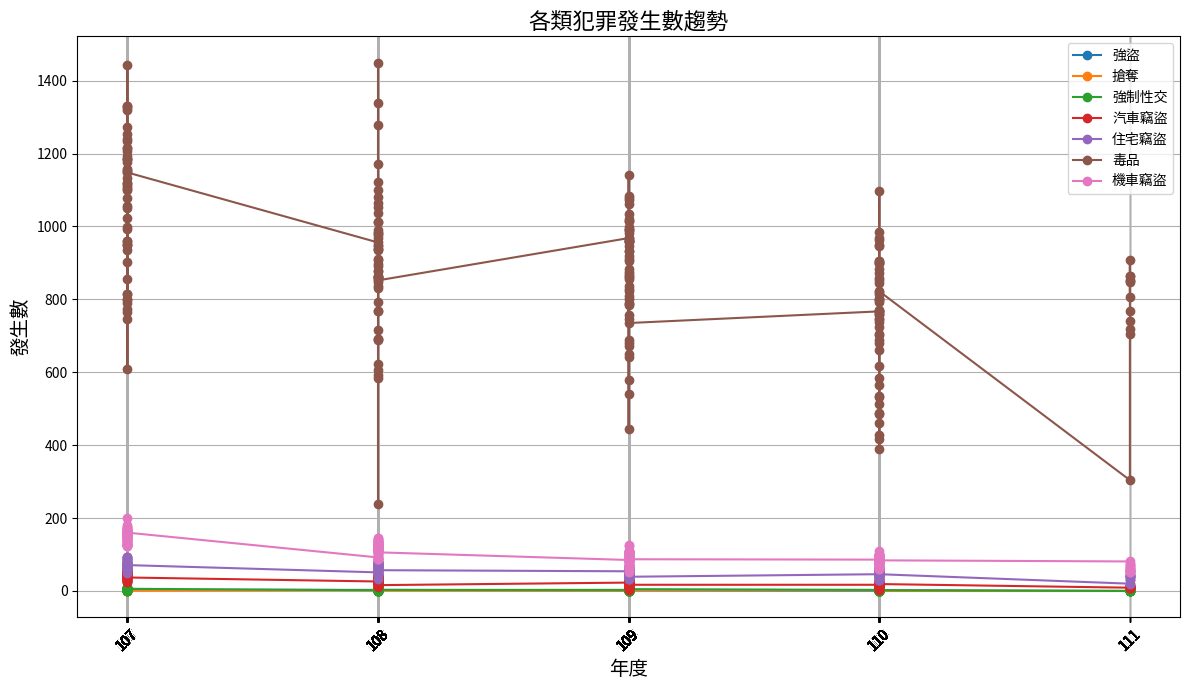

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# 假設 df_all 是你的犯罪統計資料表，有「年度」欄和多個犯罪類別的「發生數」欄
# crime_types 是你想繪圖的案件類別清單
crime_types = ["強盜", "搶奪", "強制性交", "汽車竊盜", "住宅竊盜", "毒品", "機車竊盜"]

# 設定中文字體路徑（你說的那個字體）
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()

plt.figure(figsize=(12, 7))
for crime in crime_types:
    col_name = crime + "_發生數"  # 你資料中發生數的欄位名稱格式
    if col_name in df_all.columns:
        plt.plot(df_all["年度"], df_all[col_name], marker='o', label=crime)

plt.title("各類犯罪發生數趨勢", fontproperties=my_font, fontsize=16)
plt.xlabel("年度", fontproperties=my_font, fontsize=14)
plt.ylabel("發生數", fontproperties=my_font, fontsize=14)
plt.legend(prop=my_font)
plt.grid(True)
plt.xticks(df_all["年度"], rotation=45, fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.tight_layout()
plt.show()


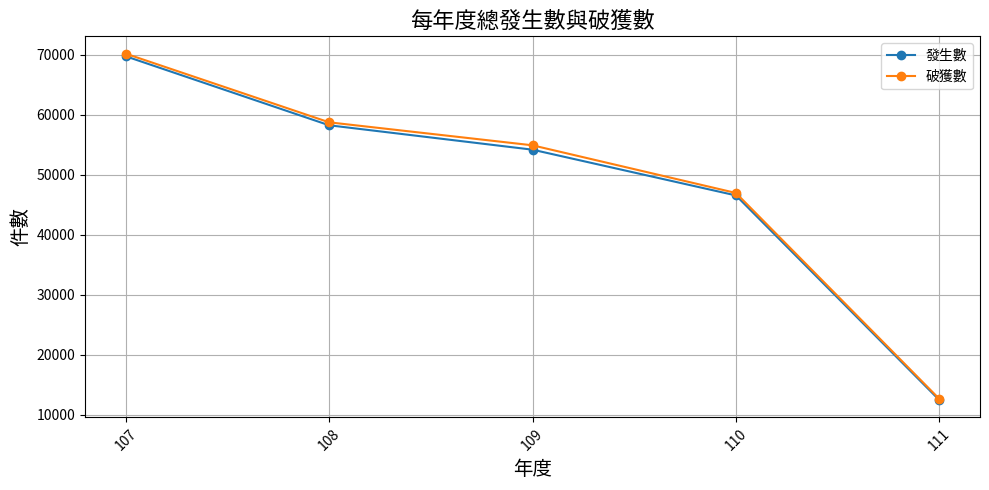

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 字體設定
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()

# 年度統計
yearly_summary = combined_df.groupby("年度")[["發生數", "破獲數"]].sum()

# 繪圖
ax = yearly_summary.plot(marker='o', figsize=(10, 5))

# 標題與軸標籤
plt.title("每年度總發生數與破獲數", fontproperties=my_font, fontsize=16)
plt.xlabel("年度", fontproperties=my_font, fontsize=14)
plt.ylabel("件數", fontproperties=my_font, fontsize=14)

# 圖例加字體
plt.legend(prop=my_font)

# 座標軸刻度加字體
plt.xticks(yearly_summary.index, rotation=45, fontproperties=my_font)
plt.yticks(fontproperties=my_font)

plt.grid(True)
plt.tight_layout()
plt.show()


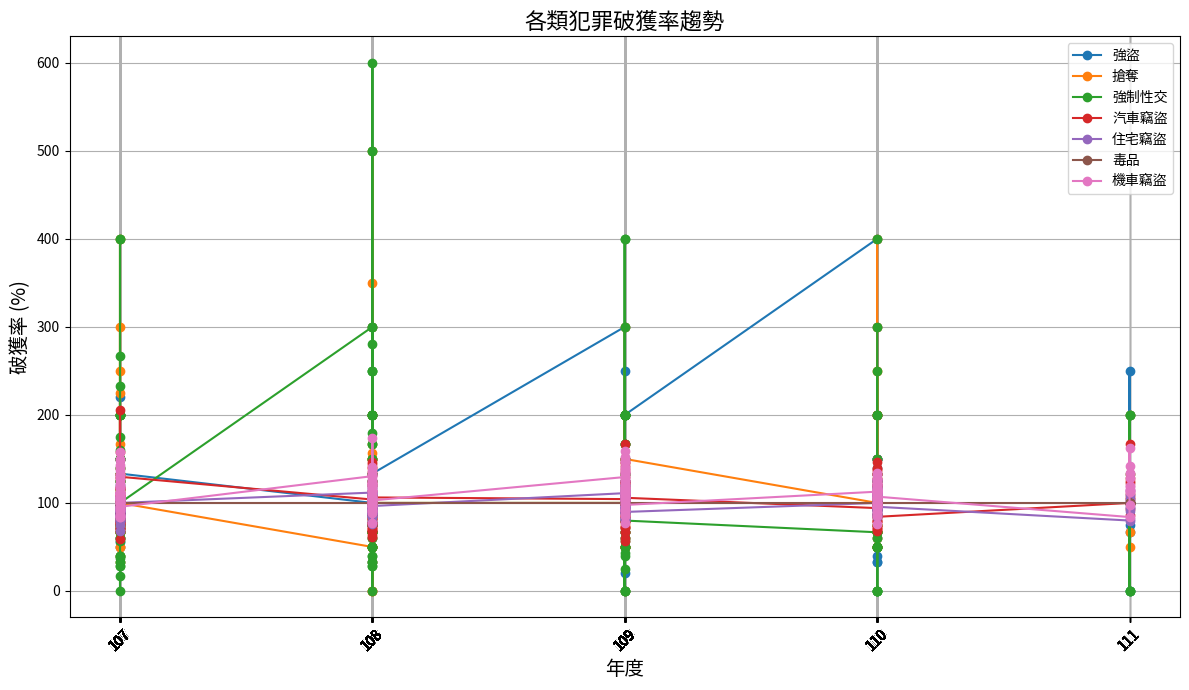

In [ ]:
plt.figure(figsize=(12, 7))
for crime in crime_types:
    occur_col = f"{crime}_發生數"
    solved_col = f"{crime}_破獲數"
    if occur_col in df_all.columns and solved_col in df_all.columns:
        rate = df_all[solved_col] / df_all[occur_col] * 100
        plt.plot(df_all["年度"], rate, marker='o', label=crime)
plt.title("各類犯罪破獲率趨勢", fontproperties=my_font, fontsize=16)
plt.xlabel("年度", fontproperties=my_font, fontsize=14)
plt.ylabel("破獲率 (%)", fontproperties=my_font, fontsize=14)
plt.legend(prop=my_font)
plt.grid(True)
plt.xticks(df_all["年度"], rotation=45, fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.tight_layout()
plt.show()


In [ ]:
avg_rate = {}
for crime in crime_types:
    occur = df_all[f"{crime}_發生數"]
    solved = df_all[f"{crime}_破獲數"]
    rate = (solved / occur).replace([np.inf, -np.inf], np.nan).mean()
    avg_rate[crime] = rate

sorted_rate = sorted(avg_rate.items(), key=lambda x: x[1])
print("破獲率排名（從低到高）:")
for crime, rate in sorted_rate:
    print(f"{crime}: {rate:.2%}")


破獲率排名（從低到高）:
住宅竊盜: 97.59%
毒品: 100.00%
汽車竊盜: 100.62%
機車竊盜: 112.56%
搶奪: 112.90%
強盜: 114.08%
強制性交: 121.52%
